# Implementation of ResNet-50 Model

In [9]:
import os
import sys
from pathlib import Path

import torch
import torchvision as vision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import random
from matplotlib import pyplot as plt

sys.path.insert(0, '../')
import filters


%matplotlib inline
plt.rcParams['figure.figsize'] = (32.0, 32.0) # set default size of plots

In [10]:
# Global Vars
device = 'cpu'

path = '../../Datasets/ImageNet-Sketch/sketch'
custom_path = '../../Datasets/Custom'
class_paths = [f for f in Path(path).glob('*')]
image_paths = [f for f in Path(path).glob('*\*.JPEG')]
num_classes = len(class_paths)
dataset_total_size = len(image_paths)

image_size = 224
batch_size = 32
epochs = 10
feature_extract = True

print('PyTorch version:', torch.__version__)
if torch.cuda.is_available():
    print('CUDA available')
    device='cuda'
else:
    print('WARNING: CUDA is not available')
    device='cpu'

print(os.getcwd())

PyTorch version: 1.10.1
CUDA available
c:\Users\Admin\Desktop\Tharja\Term 7\CV\50.039-CV-Project\Models\ResNet-50


In [11]:
# get class mapping
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

classes, class_dict = find_classes(path)

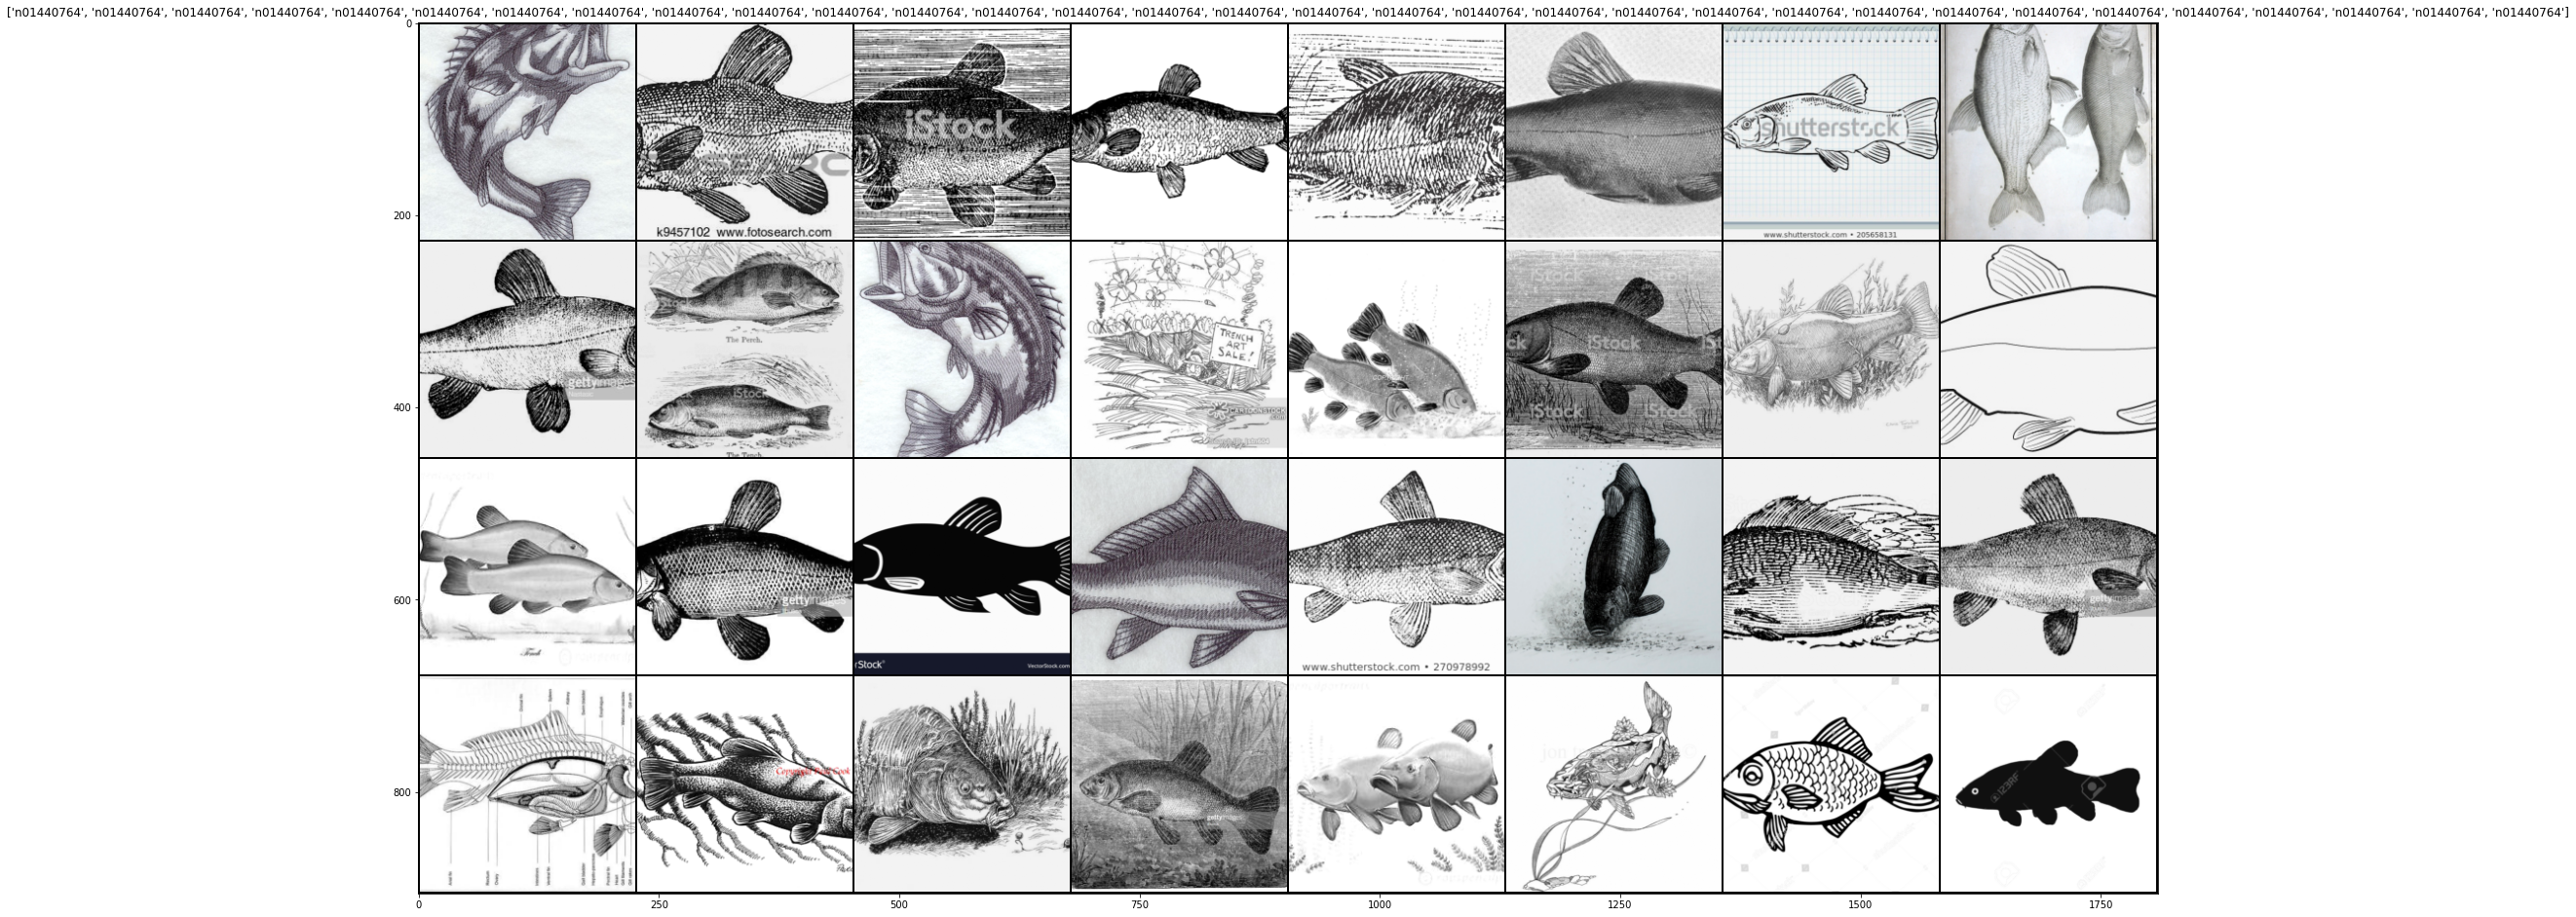

In [18]:
# Test loading in the data
idx = random.randint(0, 999)

# Apply transforms
transform = [transforms.Resize(image_size+1), transforms.CenterCrop(image_size), transforms.ToTensor()]
transform = filters.get_color_distortion(transform, 0.1)

full = datasets.ImageFolder(path, transform=transform)
full_dataloader = DataLoader(full, batch_size=batch_size, shuffle=False)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, labels = next(iter(full_dataloader))

# Make a grid from batch
out = vision.utils.make_grid(inputs)
imshow(out, title=[classes[x] for x in labels])
